In [5]:
import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
from datetime import datetime, date, time
import datapane as dp
# Let's draw
import plotly.express as px

In [23]:
# Set up pytrend
pytrend = TrendReq()

# Chose your keywords, timeframe and category
# Timeframe -  https://github.com/GeneralMills/pytrends
# All available categories - https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
pytrend.build_payload(kw_list=['coursera','udemy','LinkedIn Learning'], timeframe='today 5-y',cat=74) # category 74 - Education

In [24]:
#to get interest over time score, you'll need pytrend.interest_over_time() function.
#For more functions, check this: https://github.com/GeneralMills/pytrends
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.tail(10))

            coursera  udemy  LinkedIn Learning  isPartial
date                                                     
2021-02-14        30     53                  4      False
2021-02-21        34     48                  6      False
2021-02-28        34     50                  5      False
2021-03-07        34     59                  5      False
2021-03-14        35     59                  4      False
2021-03-21        33     56                  5      False
2021-03-28        31     58                  5      False
2021-04-04        31     62                  5      False
2021-04-11        34     61                  6      False
2021-04-18        35     53                  5      False


In [25]:
df=interest_over_time_df.iloc[:,0:3].reset_index().melt(id_vars='date',value_name='count')

In [26]:
df.head()

,date,variable,count
0,2016-05-01,coursera,23
1,2016-05-08,coursera,18
2,2016-05-15,coursera,18
3,2016-05-22,coursera,20
4,2016-05-29,coursera,24


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      780 non-null    datetime64[ns]
 1   variable  780 non-null    object        
 2   count     780 non-null    int32         
 3   months    780 non-null    object        
 4   weeks     780 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 27.5+ KB


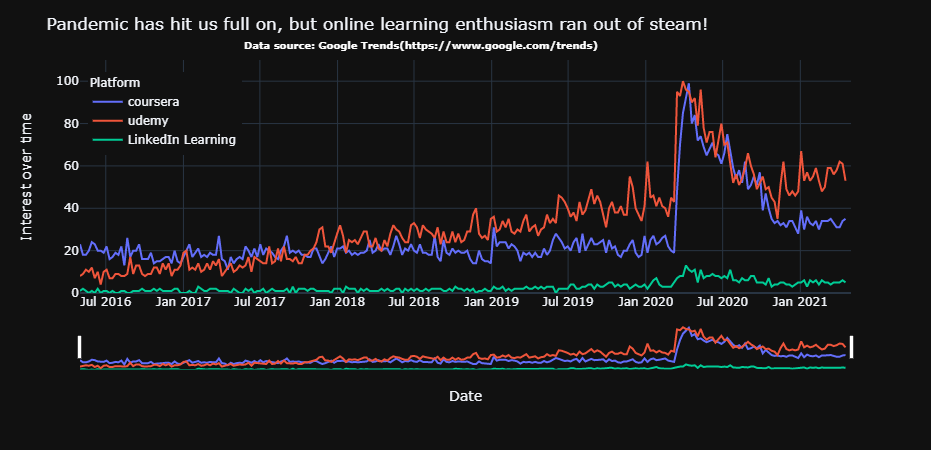

In [29]:
chart1 = px.line(df, 
        x="date", 
        y="count", 
        color="variable",line_group = 'variable',#facet_row='variable',
        template='plotly_dark',
        labels={'count':'Interest over time','date':'Date','variable':'Platform'},
        range_x=['2016-05-01', '2021-05-01'],
        range_y=[0,110])
#fig_static.update_layout(legend_orientation='h', title_x=0.5)
chart1.update_layout(title_text='Pandemic has hit us full on, but online learning enthusiasm ran out of steam!',
                     legend=dict(
    yanchor="top",
    y=0.95,
    xanchor="left",
    x=0.01
))
chart1.add_annotation(dict(font=dict(color="white",size=10),
                            x=0.21,
                            y=1.1,
                            showarrow=False,
                            text='<b>Data source: Google Trends(https://www.google.com/trends)</b>',
                            textangle=0,
                            xref="paper",
                            yref="paper"))
# This styles the line
chart1.update_xaxes(rangeslider_visible=True)

In [ ]:
# Create a feature-rich report and share it! 
dp.Report(
    dp.Plot(chart1)
).publish(name='Online learning enthusiasm ran out of steam!', open=True)